## 0. References
- input references here

## 1. Load Library

In [291]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()

## 2. Data Processing

### 2.a Load the data

In [269]:
# load all files into data, drop the last two columns which are 'na'
allfile = [i+str(j)+'.txt' for i in ['data/'+item for item in ['train_FD00','test_FD00','RUL_FD00']] for j in range(1,4+1)]
data = [pd.read_csv(file, sep=' ', header=None) for file in allfile]
[f.drop(f.columns[[-1, -2]], axis=1, inplace=True) for f in data[0:8]]
header = ['id','cycle'] + ['setting'+str(i) for i in range(1,3+1)] + ['sensor'+str(j) for j in range(1,21+1)]
for k in range(8): data[k].columns = header

In [270]:
# shape of the data sets
pd.DataFrame(np.array([ [np.shape(dd)[0] for dd in data], [np.shape(ff)[1] for ff in data] ]),
                     index=['#columns', '#rows'],
                     columns=[string + str(h) for string in ['train','test','URL'] for h in range(1,4+1)])

train1  train2  train3  train4  test1  test2  test3  test4  URL1  \
#columns   20631   53759   24720   61249  13096  33991  16596  41214   100   
#rows         26      26      26      26     26     26     26     26     2   

          URL2  URL3  URL4  
#columns   259   100   248  
#rows        2     2     2

In [277]:
# There are certain groups in each train/test data set, review data information in train1
print('train1 groups = ', len(np.unique(data[0]['id'])))
data[0]['cycle'].groupby(data[0]['id']).describe()[0:4]

train1 groups =  100


count   mean        std  min    25%    50%     75%    max
id                                                           
1   192.0   96.5  55.569776  1.0  48.75   96.5  144.25  192.0
2   287.0  144.0  82.993976  1.0  72.50  144.0  215.50  287.0
3   179.0   90.0  51.816986  1.0  45.50   90.0  134.50  179.0
4   189.0   95.0  54.703748  1.0  48.00   95.0  142.00  189.0

### 2.b Create Labels

In [278]:
# add columns of rul (remaining useful life), w1 = 30 remaining time series, w2 = 15 remaining time series
for item in data[0:8]:
    item['rul'] = item.groupby('id')['cycle'].transform('max') - item['cycle']
    item['w1'] = np.where(item['rul'] > 30, 0, 1)
    item['w2'] = np.where(item['rul'] > 15, 0, 1)

In [279]:
# assign to separate data sets for easier to manage
train1,train2,train3,train4, test1,test2,test3,test4, RUL1,RUL2,RUL3,RUL4 = data

In [330]:
train1[0:5]

id  cycle  setting1  setting2  setting3  sensor1  sensor2  sensor3  \
0   1      1   -0.0007   -0.0004     100.0   518.67   641.82  1589.70   
1   1      2    0.0019   -0.0003     100.0   518.67   642.15  1591.82   
2   1      3   -0.0043    0.0003     100.0   518.67   642.35  1587.99   
3   1      4    0.0007    0.0000     100.0   518.67   642.35  1582.79   
4   1      5   -0.0019   -0.0002     100.0   518.67   642.37  1582.85   

   sensor4  sensor5 ...  sensor15  sensor16  sensor17  sensor18  sensor19  \
0  1400.60    14.62 ...    8.4195      0.03       392      2388     100.0   
1  1403.14    14.62 ...    8.4318      0.03       392      2388     100.0   
2  1404.20    14.62 ...    8.4178      0.03       390      2388     100.0   
3  1401.87    14.62 ...    8.3682      0.03       392      2388     100.0   
4  1406.22    14.62 ...    8.4294      0.03       393      2388     100.0   

   sensor20  sensor21  rul  w1  w2  
0     39.06   23.4190  191   0   0  
1     39.00   23.4236  190   0   0  
2     38.95   23.3442  189   0   0  
3     38.88   23.3739  188   0   0  
4     38.90   23.4044  187   0   0  

[5 rows x 29 columns]

### 2.c Explore the Data

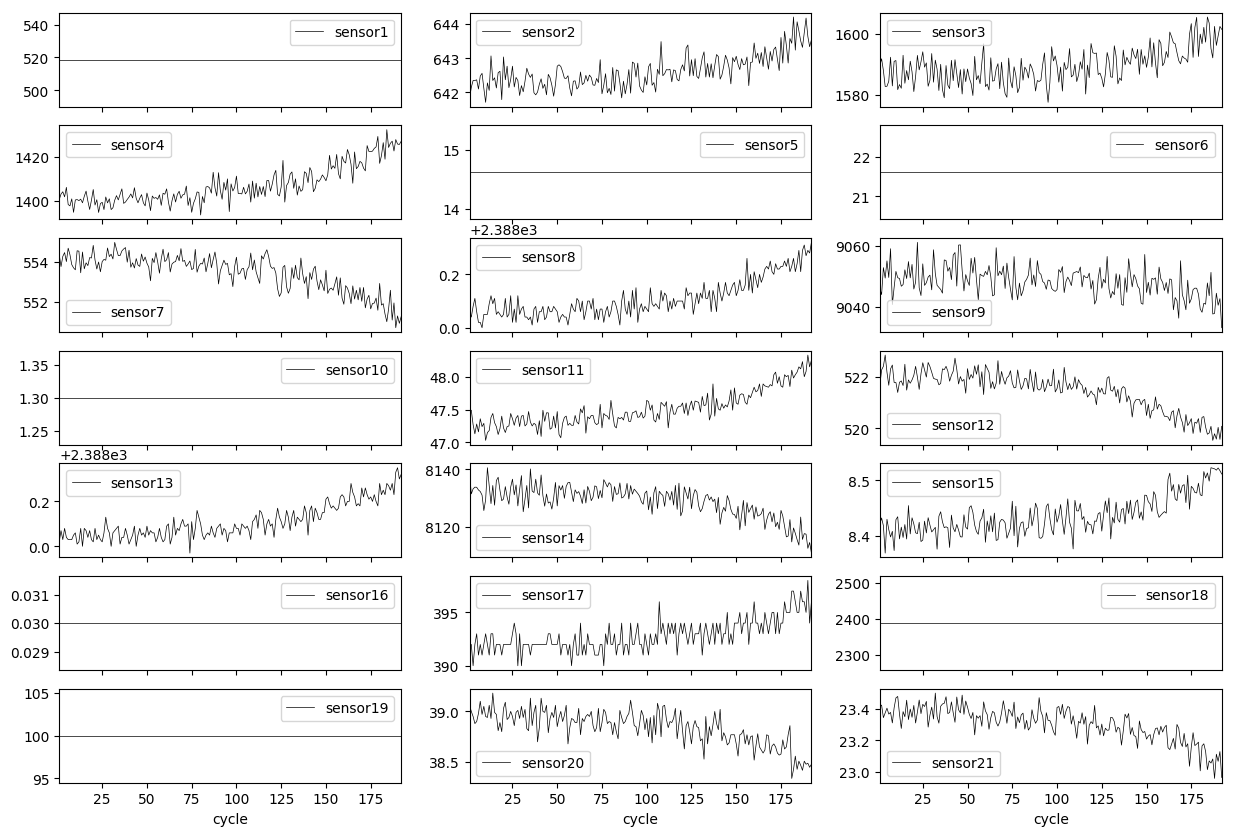

In [343]:
# look at one group of sensor data under train1
_, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True)
for index, ax in enumerate(axes.ravel()):
    train1[train1['id']==1].plot(x='cycle', y='sensor'+str(index+1), ax=ax, color='black', linewidth=0.5)
plt.show()